# Cube Extracted Spectra examination

This notebook is pretty hacked together, but it gives a clear idea of why W51-E has problems in B6: there is a lot of error in how the continuum channels are selected.  There are many channels that are likely line-dominated and are injecting a lot of amplitude noise into the images.   See the spectra below.

In [1]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')

In [2]:
import spectral_cube as SpectralCube

In [3]:
import sys
sys.executable

'/apps/python3/3.6.5/bin/python3'

import subprocess
for module in ('pyspeckit', 'spectral-cube', 'radio-beam', 'reproject'):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--user', '--editable',
                           f'/orange/adamginsburg/repos/{module}'])

%%bash
pip install --user --editable /orange/adamginsburg/repos/spectral-cube
pip install --user --editable /orange/adamginsburg/repos/radio-beam
pip install --user --editable /orange/adamginsburg/repos/reproject
pip install --user astropy
pip install --user --editable /orange/adamginsburg/repos/pyspeckit

In [4]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/spectra

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/spectra


In [5]:
%%bash
ls
ls pngs

casa-20190830-214908.log
pngs
W51-E_12M_B3_robust0.maxspec.fits
W51-E_12M_B3_robust0.meanspec.fits
W51-E_12M_B3_robust0.medianspec.fits
W51-E_12M_B3_spw1_robust0.maxspec.fits
W51-E_12M_B3_spw1_robust0.meanspec.fits
W51-E_12M_B6_robust0.maxspec.fits
W51-E_12M_B6_robust0.meanspec.fits
W51-E_12M_B6_robust0.medianspec.fits
W51-E_12M_B3_robust0.maxspec.png
W51-E_12M_B3_robust0.meanspec.png
W51-E_12M_B3_robust0.medianspec.png
W51-E_12M_B3_spw1_robust0.maxspec.png
W51-E_12M_B3_spw1_robust0.meanspec.png
W51-E_12M_B6_robust0.maxspec.png
W51-E_12M_B6_robust0.meanspec.png
W51-E_12M_B6_robust0.medianspec.png


In [6]:
import pyspeckit

## A better continuum selection approach?

Let's try "statcont" ing some of the spectra

os.chdir('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/spectra/')
import glob
for fn in glob.glob("*spec*fits"):
    pl.figure()
    sp = pyspeckit.Spectrum(fn)
    sp.plotter(color='w')

In [42]:
%ls *spw1*fits

W51-E_12M_B3_spw1_robust0_lines.maxspec.fits
W51-E_12M_B3_spw1_robust0_lines.meanspec.fits
W51-E_12M_B3_spw1_robust0_lines.medianspec.fits
W51-E_12M_B3_spw1_robust0.maxspec.fits
W51-E_12M_B3_spw1_robust0.meanspec.fits
W51-E_12M_B3_spw1_robust0.medianspec.fits
W51-E_12M_B6_spw1_robust0.maxspec.fits
W51-E_12M_B6_spw1_robust0.meanspec.fits
W51-E_12M_B6_spw1_robust0.medianspec.fits


In [43]:
from spectral_cube import OneDSpectrum
from astropy.io import fits
spec = OneDSpectrum.from_hdu(fits.open('W51-E_12M_B6_spw1_robust0.maxspec.fits'))

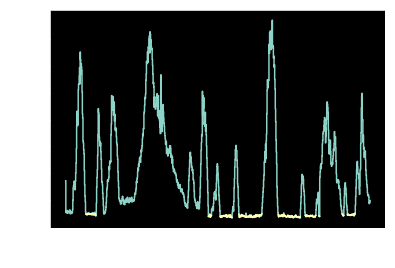

In [62]:
from astropy import stats
spec = OneDSpectrum.from_hdu(fits.open('W51-E_12M_B6_spw1_robust0.maxspec.fits'))
clipped = stats.sigma_clip(spec.value, sigma=1.8, stdfunc=stats.mad_std)
spec.quicklook()
pl.plot(spec.spectral_axis, clipped)
maxsel = clipped.mask

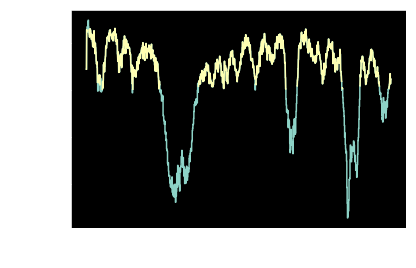

In [63]:
spec = OneDSpectrum.from_hdu(fits.open('W51-E_12M_B6_spw1_robust0.medianspec.fits'))
clipped = stats.sigma_clip(spec.value, sigma=1.8, stdfunc=stats.mad_std)
spec.quicklook()
pl.plot(spec.spectral_axis, clipped)
medsel = clipped.mask

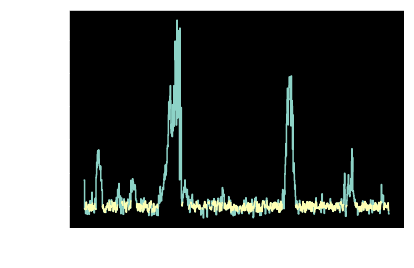

In [64]:
spec = OneDSpectrum.from_hdu(fits.open('W51-E_12M_B6_spw1_robust0.meanspec.fits'))
clipped = stats.sigma_clip(spec.value, sigma=1.8, stdfunc=stats.mad_std)
spec.quicklook()
pl.plot(spec.spectral_axis, clipped)
meansel = clipped.mask

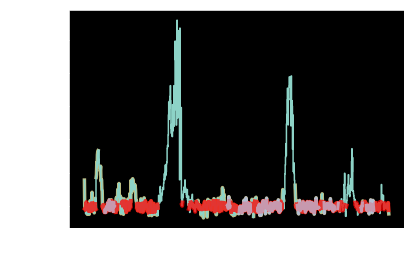

In [80]:
spec = OneDSpectrum.from_hdu(fits.open('W51-E_12M_B6_spw1_robust0.meanspec.fits'))
clipped = stats.sigma_clip(spec.value, sigma=1.8, stdfunc=stats.mad_std)
spec.quicklook()
pl.plot(spec.spectral_axis, clipped, linewidth=4, alpha=0.75, zorder=10, color='r')
meansel = clipped.mask
clipped.mask = medsel
pl.plot(spec.spectral_axis, clipped, linewidth=3.5, alpha=0.75, zorder=-1)
clipped.mask = maxsel
pl.plot(spec.spectral_axis, clipped, linewidth=3, alpha=0.75, zorder=11)

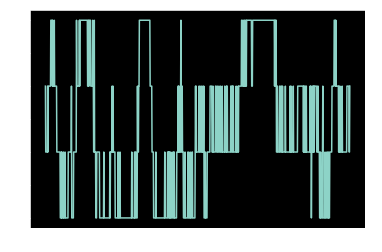

In [74]:
pl.plot(maxsel.astype('int')+medsel+meansel)

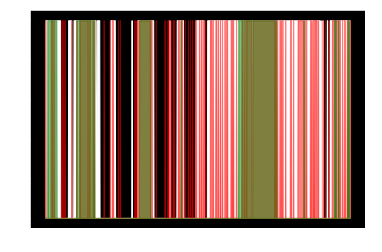

In [72]:
pl.fill_between(np.arange(len(maxsel)), 0, maxsel, label='max', color='w')
pl.fill_between(np.arange(len(maxsel)), 0, meansel, label='mean', color='r', alpha=0.5)
pl.fill_between(np.arange(len(maxsel)), 0, medsel, label='median', alpha=0.5, color='g')

In [58]:
%ls W51-E_12M_B6_spw1*fits

W51-E_12M_B6_spw1_robust0.maxspec.fits
W51-E_12M_B6_spw1_robust0.meanspec.fits
W51-E_12M_B6_spw1_robust0.medianspec.fits


less ../../science_goal.uid___A001_X1296_X105/group.uid___A001_X1296_X106/member.uid___A001_X1296_X107/calibration/cont.dat

In [10]:
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/reduction/')
import metadata_tools, parse_contdotdat

In [11]:
from casatools import msmetadata as msmdtool

In [13]:
parse_contdotdat.parse_contdotdat('../../science_goal.uid___A001_X1296_X105/group.uid___A001_X1296_X106/member.uid___A001_X1296_X107/calibration/cont.dat')

'93.1652149435~93.165764346GHz;93.1753483661~93.1756535897GHz;93.182856866~93.1857870123GHz;93.1901211871~93.1905485001GHz;93.1933565569~93.1944553618GHz;93.1982401341~93.1998272967GHz;93.2006819227~93.2018417723GHz;93.2026353536~93.2051992316GHz;93.2059928129~93.214722207GHz;105.187328117~105.195140752GHz;105.227856161~105.234692217GHz;105.397292683~105.399245842GHz;105.428543223~105.430496382GHz;91.7412087132~91.7470681753GHz;92.0688503001~92.0991241874GHz;92.1191440161~92.1235386126GHz;92.1694377321~92.205082793GHz;92.2578179515~92.3227603227GHz;92.3598702491~92.3891675594GHz;92.4179765812~92.4262774857GHz;92.6059676556~92.6079208096GHz;102.114883785~102.629052594GHz;102.650049041~102.927397459GHz;102.949858774~103.048004957GHz'

In [41]:
for fn in glob.glob("pngs/*png"):
    print(f"'{fn}'")

'pngs/W51-E_12M_B6_spw2_robust0.medianspec.png'
'pngs/W51-E_12M_B6_spw6_robust0.maxspec.png'
'pngs/W51-E_12M_B3_spw1_robust0_lines.meanspec.png'
'pngs/W51-E_12M_B6_spw1_robust0.meanspec.png'
'pngs/W51-E_12M_B6_spw1_robust0.medianspec.png'
'pngs/W51-E_12M_B6_spw2_robust0.maxspec.png'
'pngs/W51-E_12M_B3_spw1_robust0_lines.maxspec.png'
'pngs/W51-E_12M_B6_spw6_robust0.medianspec.png'
'pngs/W51-E_12M_B3_spw1_robust0_lines.medianspec.png'
'pngs/W51-E_12M_B6_spw0_robust0.meanspec.png'
'pngs/W51-E_12M_B6_spw3_robust0.maxspec.png'
'pngs/W51-E_12M_B6_spw5_robust0.medianspec.png'
'pngs/W51-E_12M_B6_spw7_robust0.meanspec.png'
'pngs/W51-E_12M_B3_spw0_robust0_lines.medianspec.png'
'pngs/W51-E_12M_B6_spw4_robust0.maxspec.png'
'pngs/W51-E_12M_B3_spw1_robust0.maxspec.png'
'pngs/W51-E_12M_B6_spw3_robust0.medianspec.png'
'pngs/W51-E_12M_B6_spw0_robust0.maxspec.png'
'pngs/W51-E_12M_B6_spw5_robust0.meanspec.png'
'pngs/W51-E_12M_B6_spw6_robust0.meanspec.png'
'pngs/W51-E_12M_B6_spw1_robust0.maxspec.png'
'png

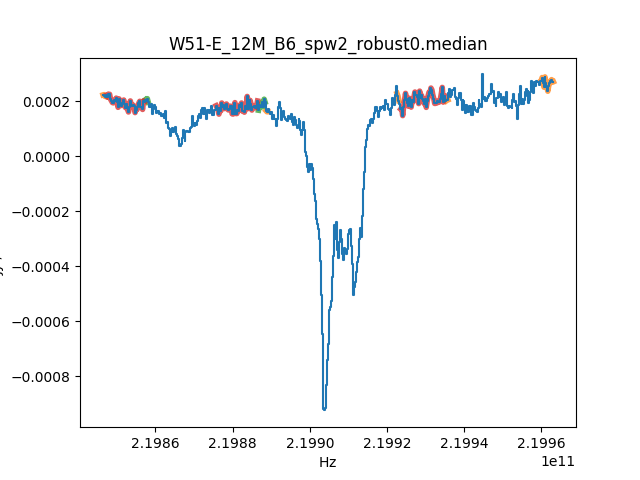

In [40]:
from IPython.display import Image, display

Image('./pngs/W51-E_12M_B6_spw2_robust0.medianspec.png')

# Band 6 spectra

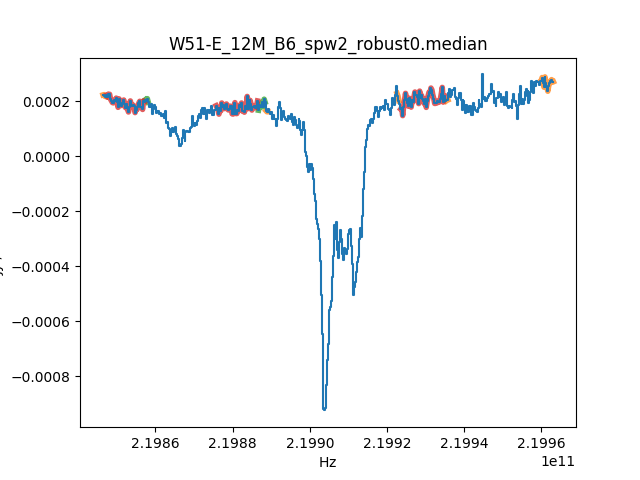

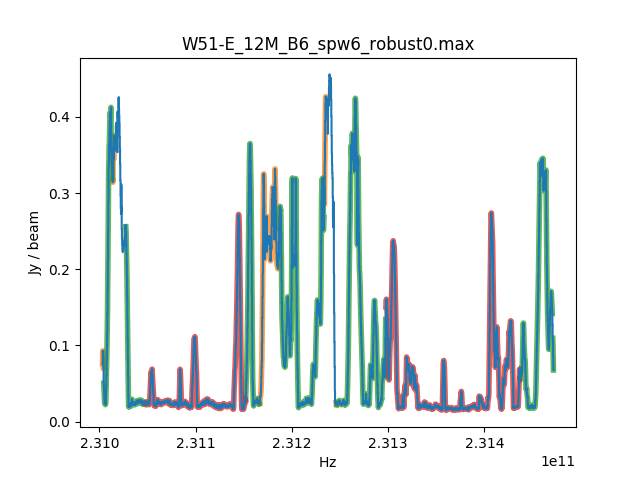

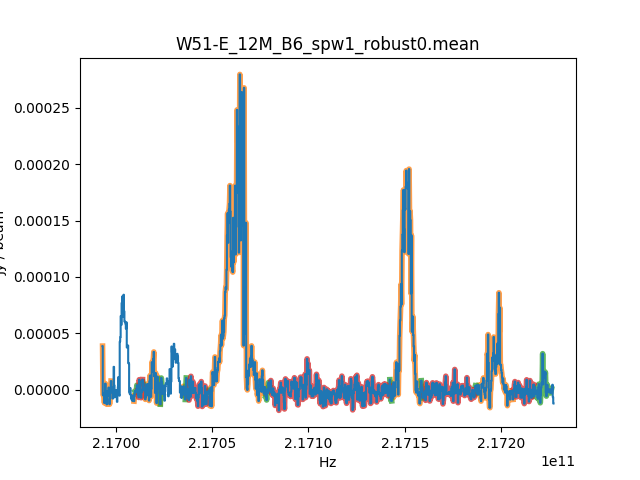

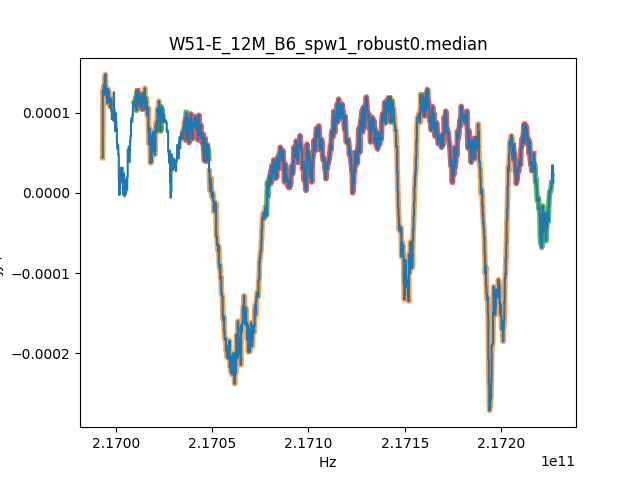

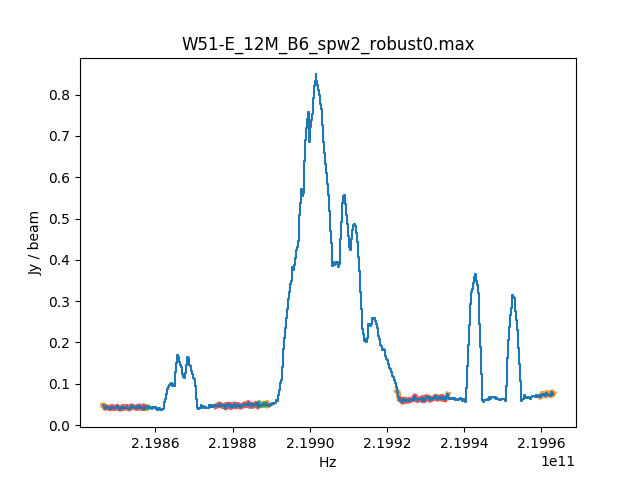

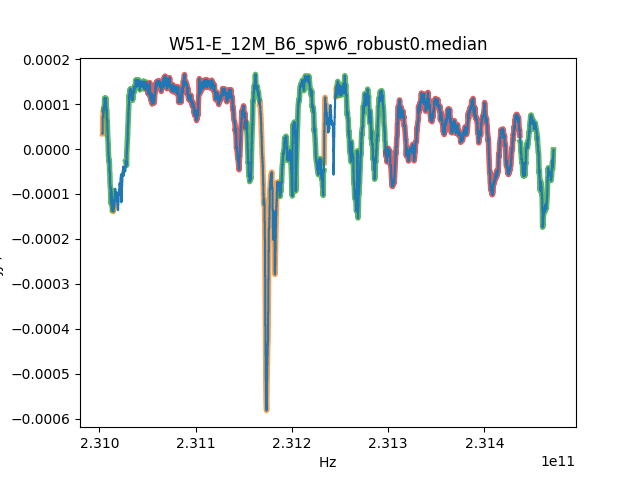

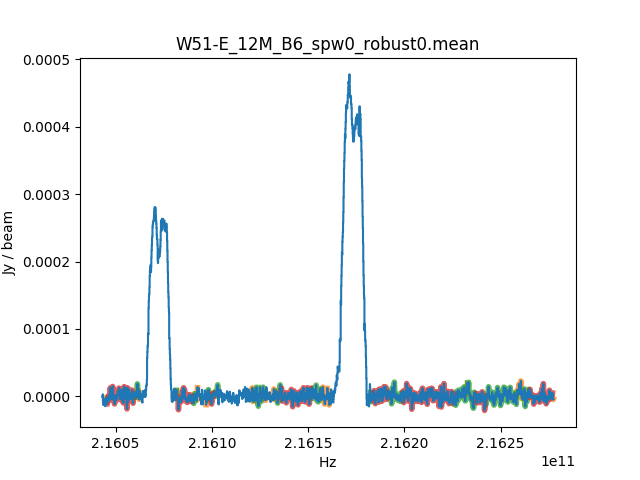

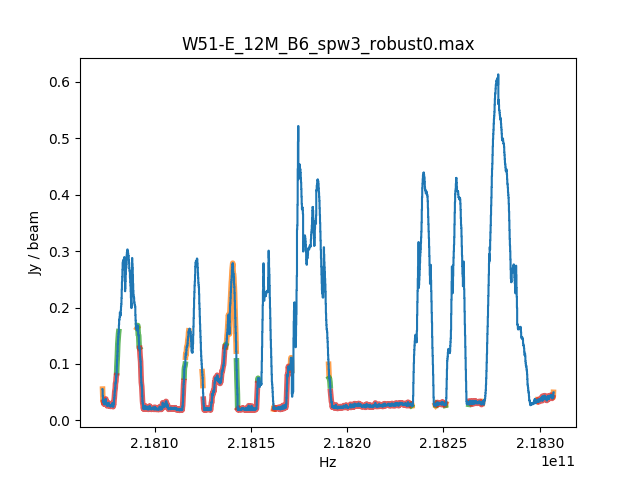

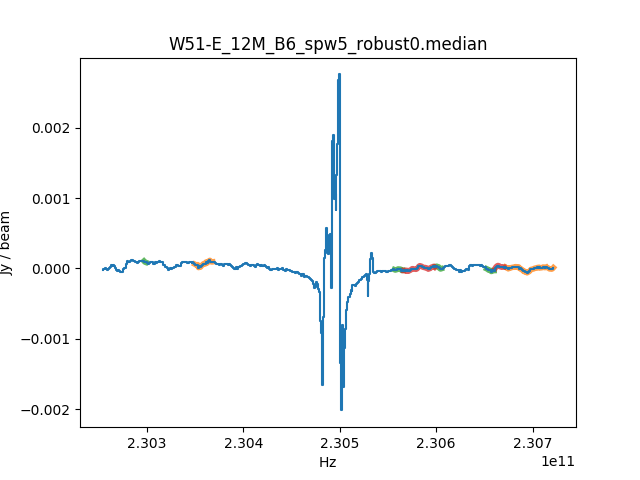

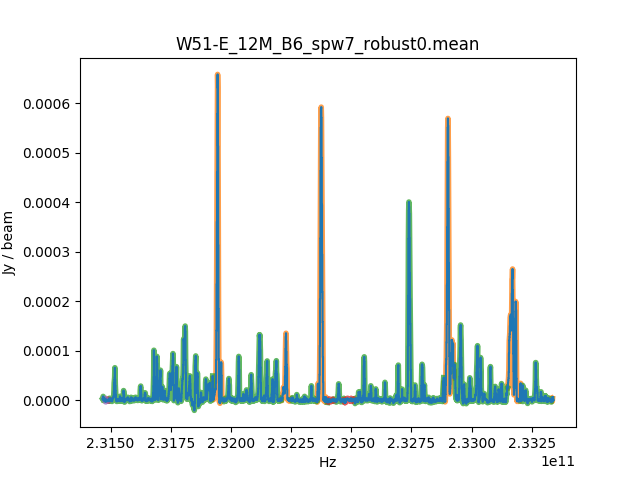

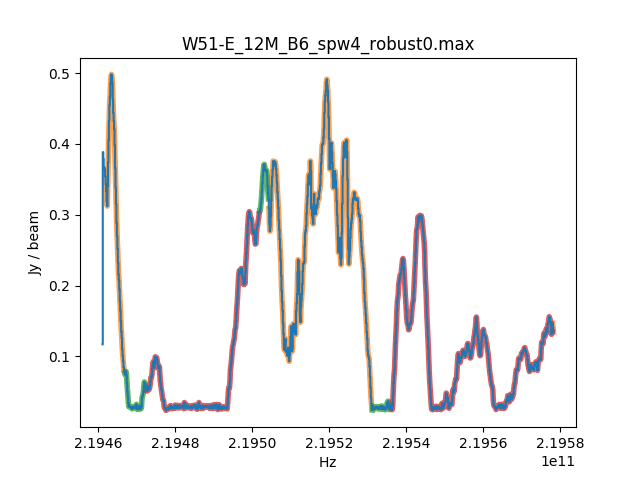

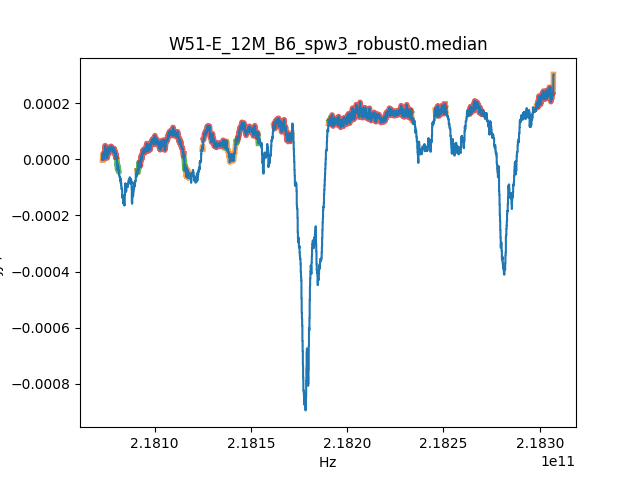

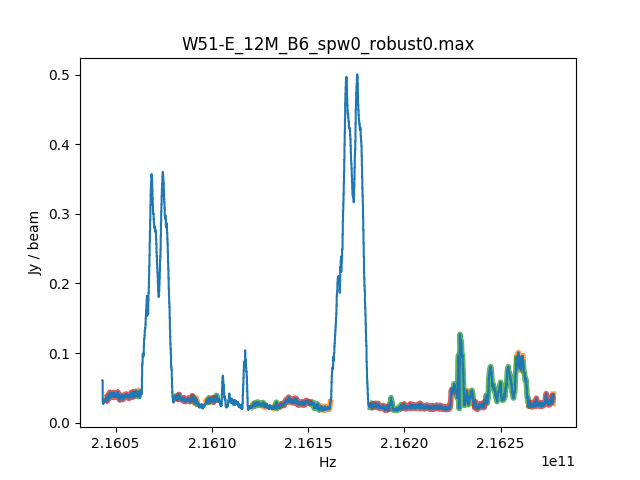

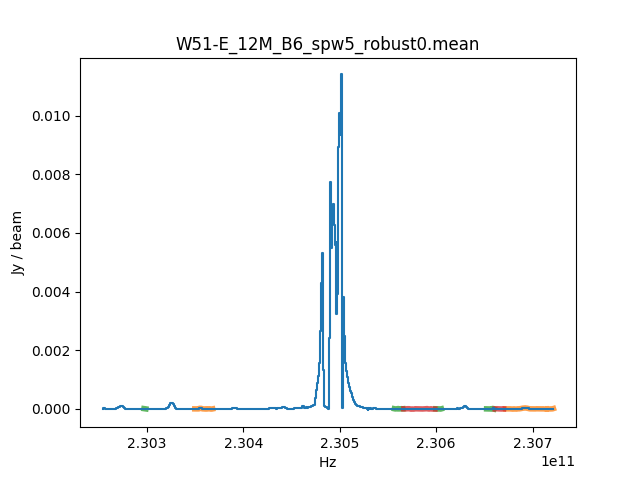

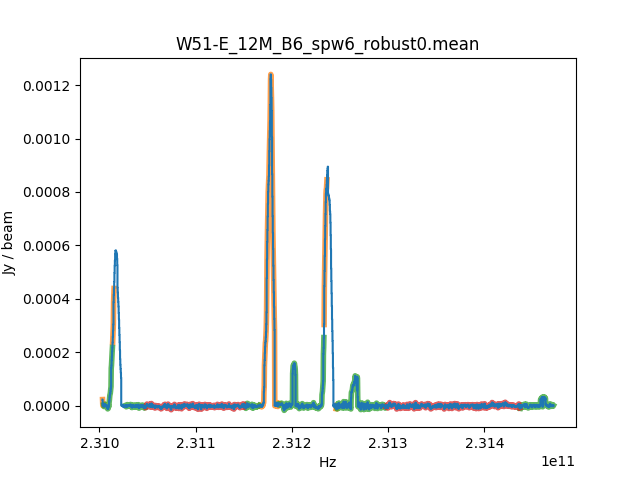

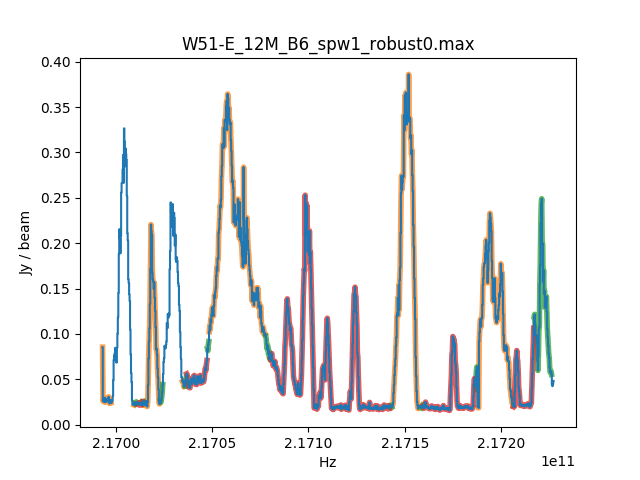

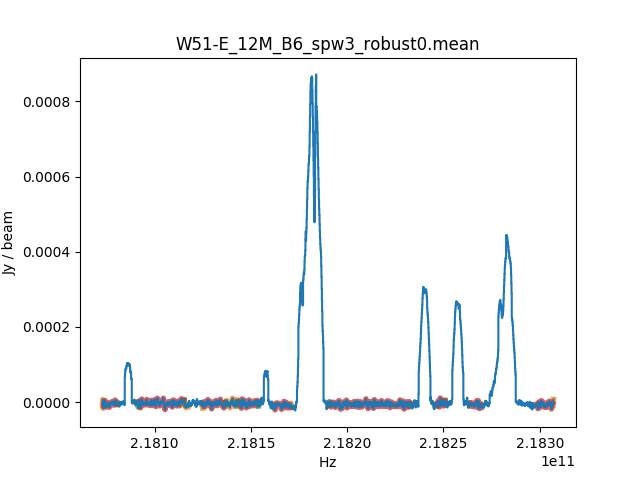

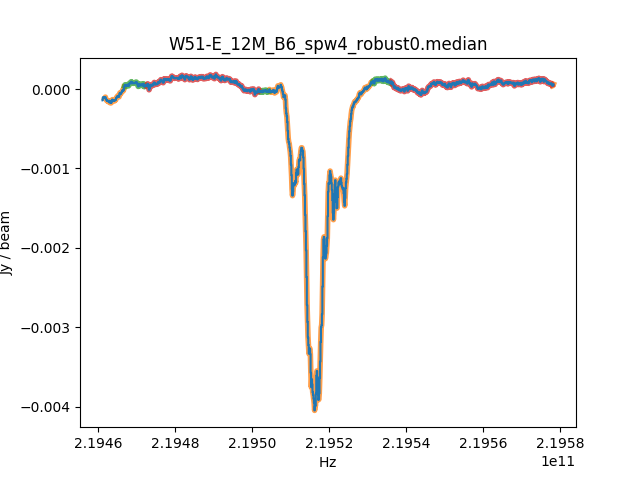

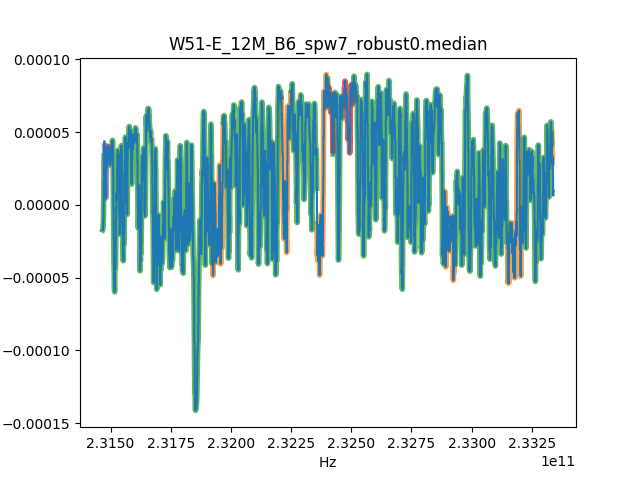

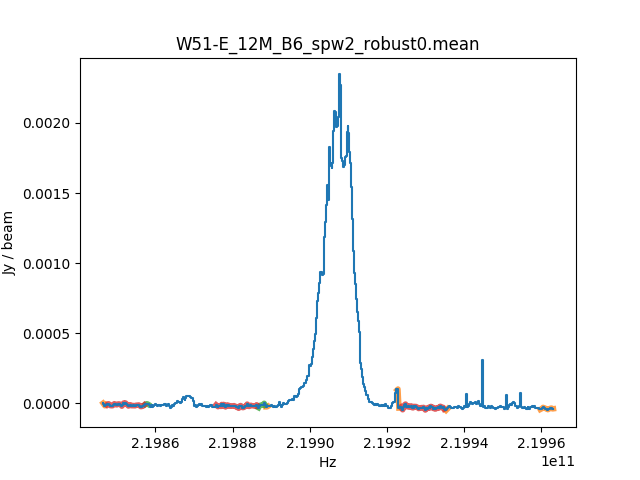

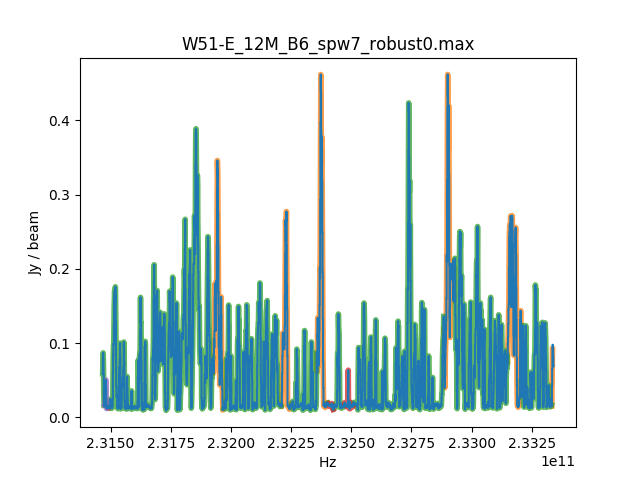

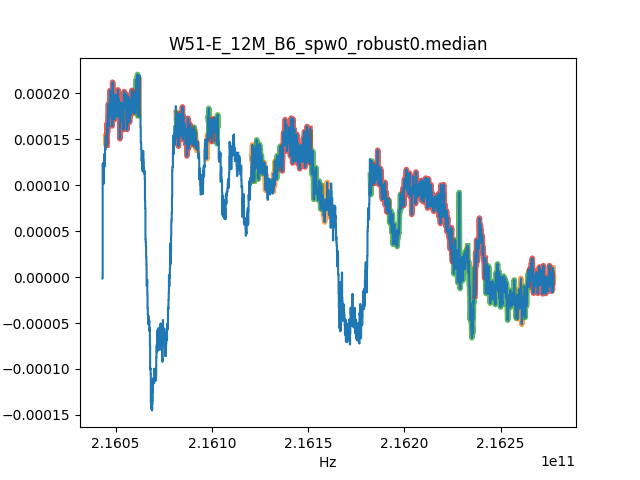

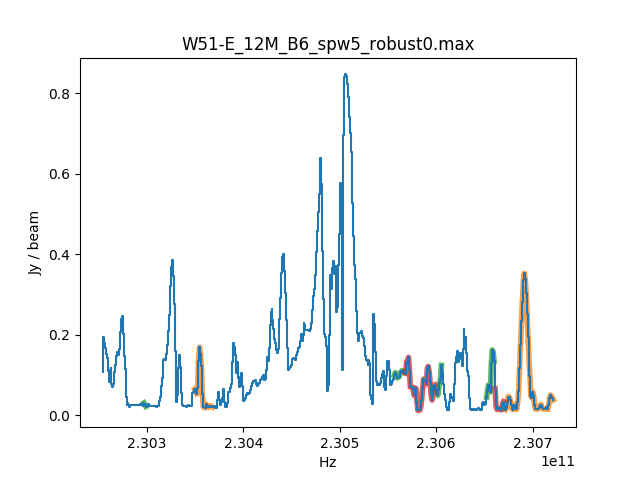

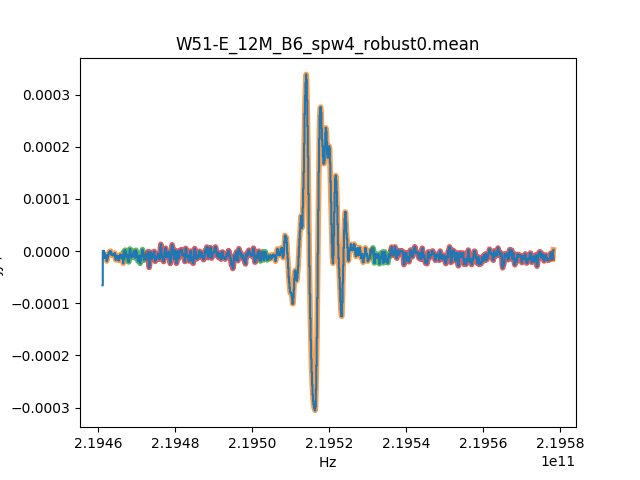

In [37]:
from IPython.display import Image, display

listOfImageNames = glob.glob("pngs/*B6*png")

for imageName in listOfImageNames:
    display(Image(filename=imageName))

# Band 3 spectra

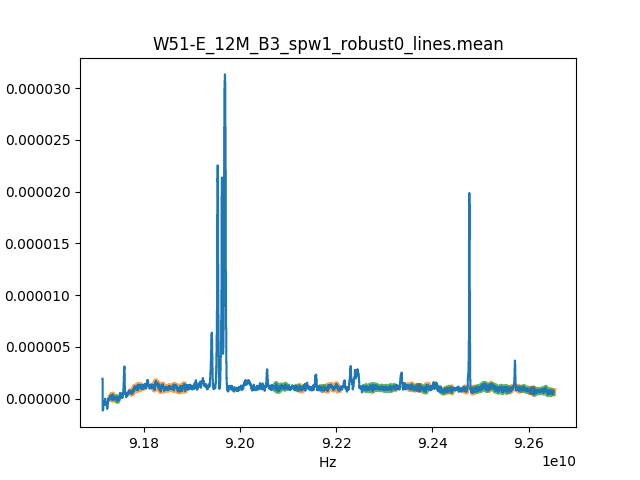

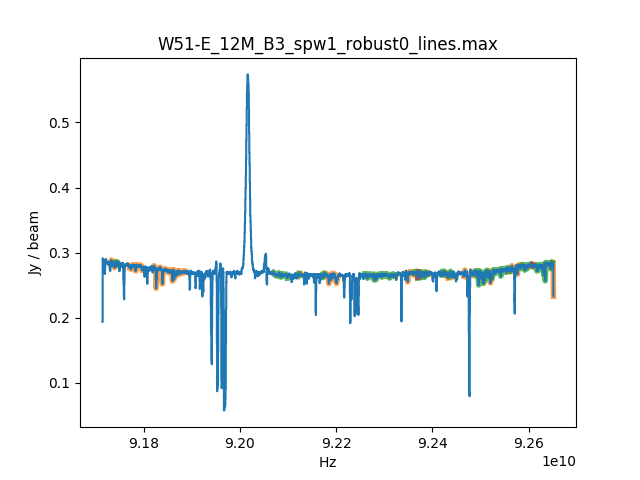

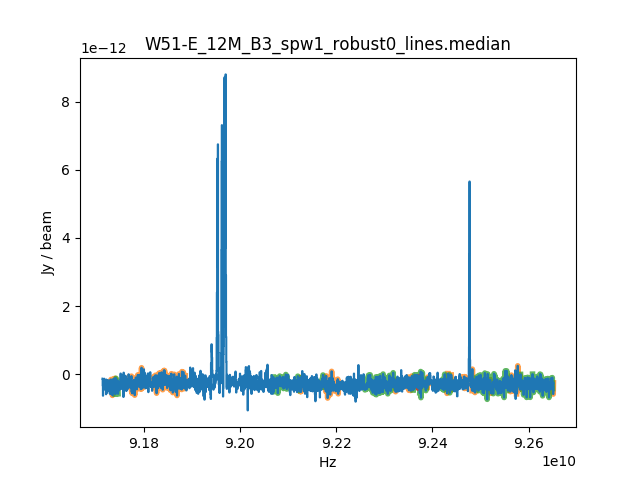

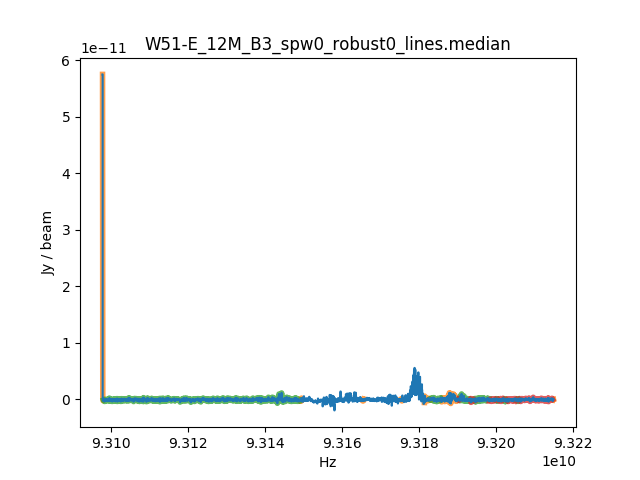

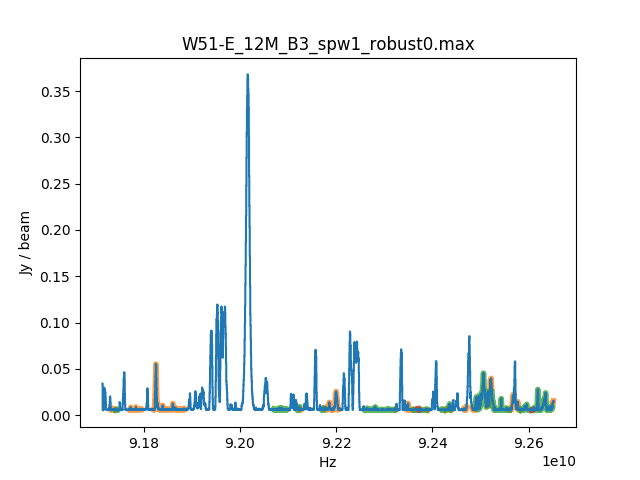

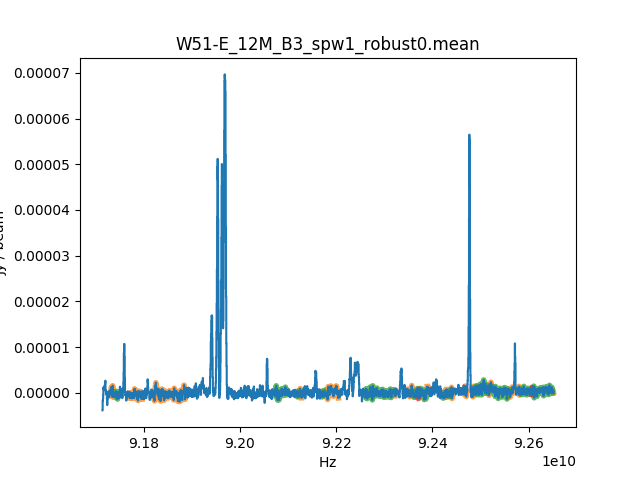

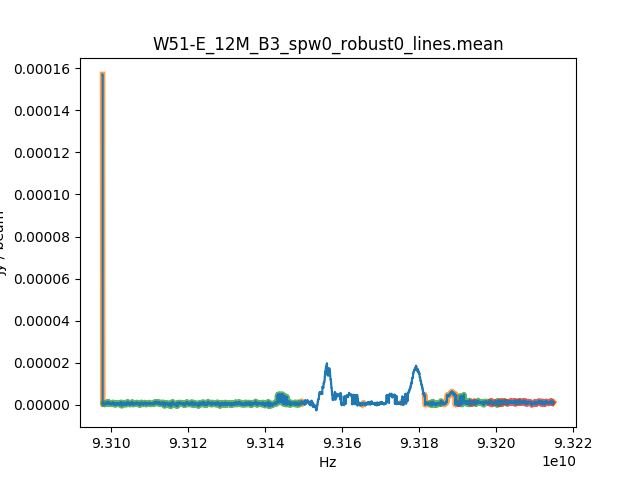

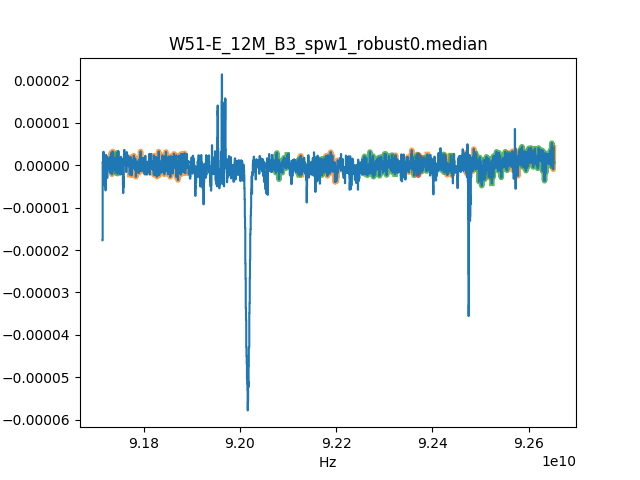

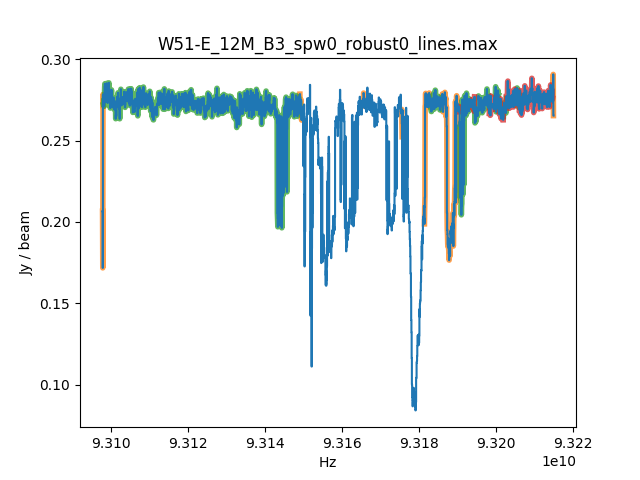

In [39]:
from IPython.display import Image, display

listOfImageNames = glob.glob("pngs/*B3*png")

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [109]:
%run ~/findcont.py

In [106]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')

Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.


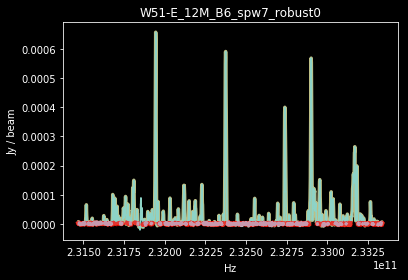

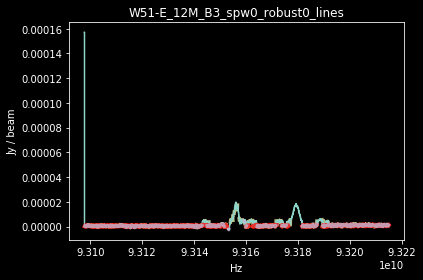

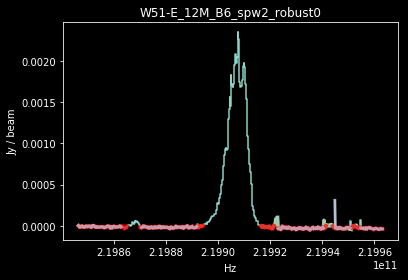

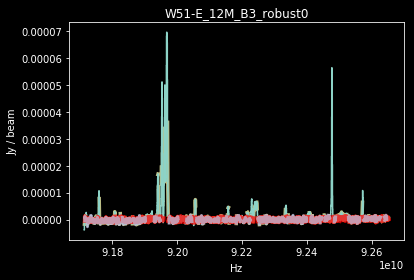

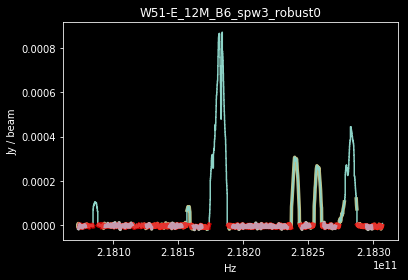

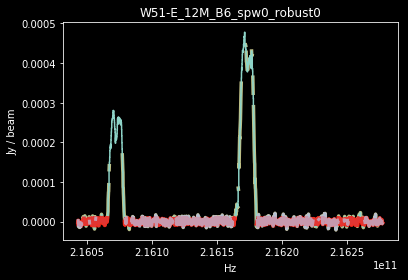

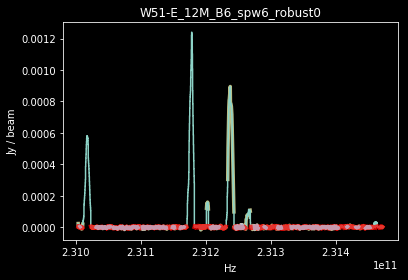

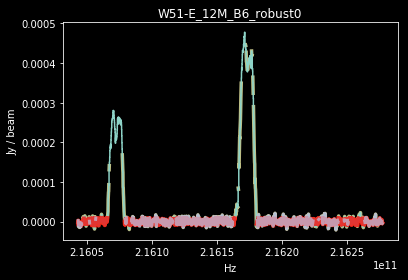

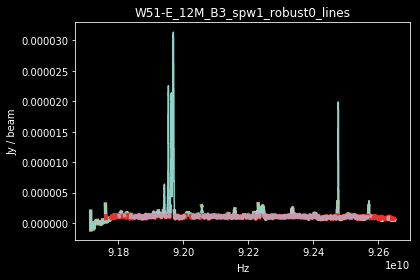

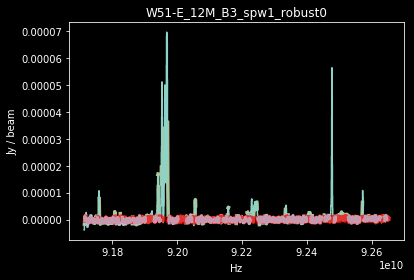

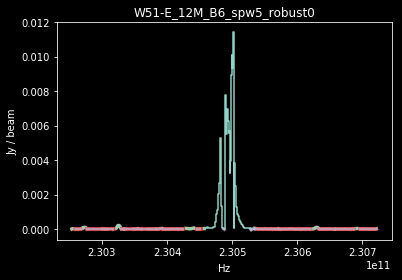

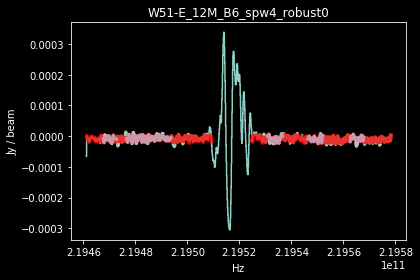

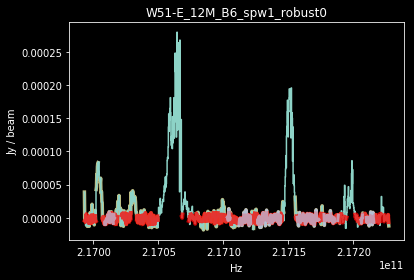

In [107]:
cont_slices = {}
for fn in glob.glob("*.meanspec.fits"):
    basename = fn.split(".")[0]
    pl.figure()
    cont_slices[basename] = find_and_plot_cont(basename)
    pl.title(basename)

Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Input data contains invalid values (NaNs or infs), which were automatically clipped.


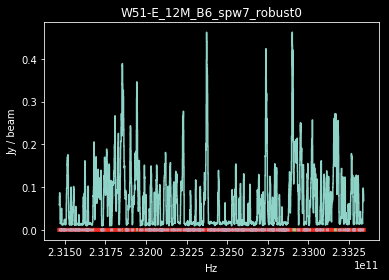

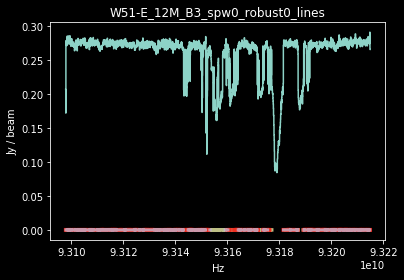

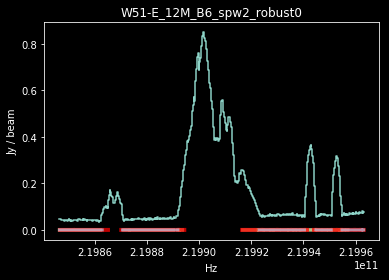

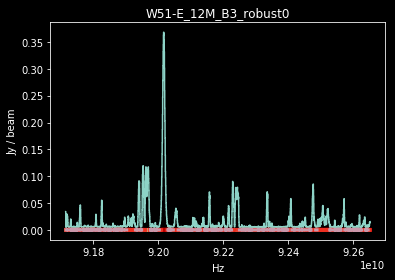

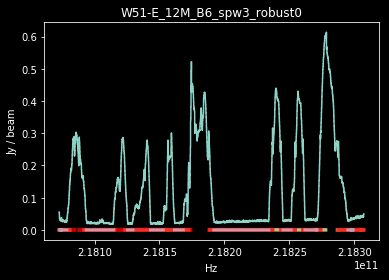

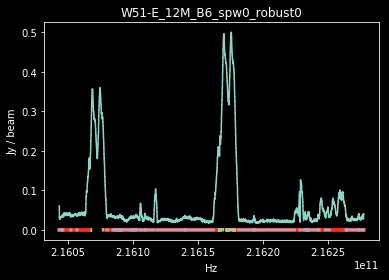

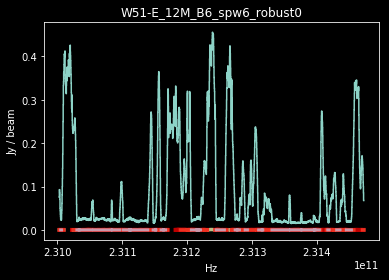

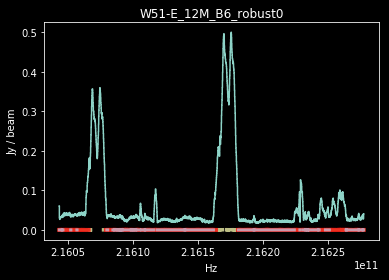

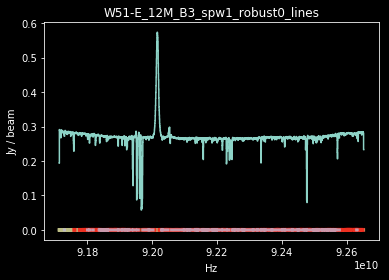

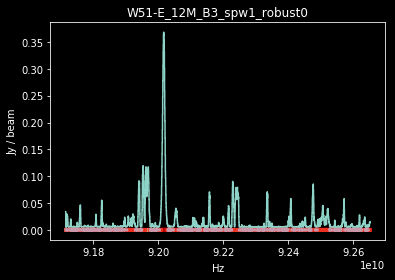

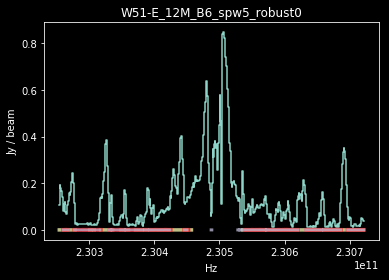

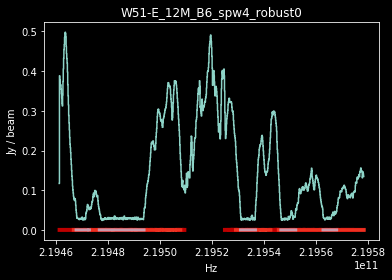

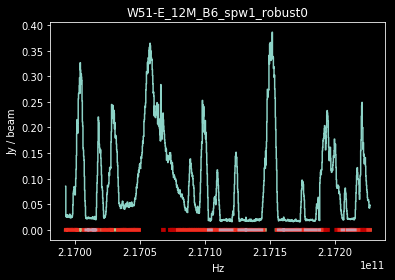

In [110]:
cont_slices = {}
for fn in glob.glob("*.meanspec.fits"):
    basename = fn.split(".")[0]
    pl.figure()
    cont_slices[basename] = find_and_plot_cont(basename, background='max')
    pl.title(basename)